In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pyspark.sql import SparkSession 

In [3]:
spark = SparkSession.builder.master("local[*]").appName("testing testing 123").getOrCreate()

df = spark.read.options(header=True, inferSchema='True',delimiter=',').csv("data/bank-additional-full.csv")

df.head()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/15 08:11:45 WARN Utils: Your hostname, Yadvendras-MacBook-Pro.local, resolves to a loopback address: 127.0.0.1; using 192.168.0.5 instead (on interface en0)
26/01/15 08:11:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/15 08:11:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Row(age=56, job='housemaid', marital='married', education='basic.4y', default='no', housing='no', loan='no', contact='telephone', month='may', day_of_week='mon', duration=261, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euribor3m=4.857, nr.employed=5191.0, y='no')

In [4]:
df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [5]:
df.head(5)

[Row(age=56, job='housemaid', marital='married', education='basic.4y', default='no', housing='no', loan='no', contact='telephone', month='may', day_of_week='mon', duration=261, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euribor3m=4.857, nr.employed=5191.0, y='no'),
 Row(age=57, job='services', marital='married', education='high.school', default='unknown', housing='no', loan='no', contact='telephone', month='may', day_of_week='mon', duration=149, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euribor3m=4.857, nr.employed=5191.0, y='no'),
 Row(age=37, job='services', marital='married', education='high.school', default='no', housing='yes', loan='no', contact='telephone', month='may', day_of_week='mon', duration=226, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euri

Problem Definition

In [ ]:
from backend.core.discovery import Problem

In [7]:
problem = Problem(target="y", type="classification", desired_result="yes")

Schema Checks

In [ ]:
from backend.core.discovery import SchemaChecks

In [9]:
schema_checker = SchemaChecks(dataframe=df, problem=problem)

schema_checker.check()

2
string ['string', 'char', 'varchar', 'bool', 'int']
4


{'categorical': [{'col_name': 'job',
   'description': {'count_distinct': 12, 'count': 41188, 'null_count': 0},
   'value_descriptions': [{'job': 'management',
     'count': 2924,
     'null_count': 0},
    {'job': 'retired', 'count': 1720, 'null_count': 0},
    {'job': 'unknown', 'count': 330, 'null_count': 0},
    {'job': 'self-employed', 'count': 1421, 'null_count': 0},
    {'job': 'student', 'count': 875, 'null_count': 0},
    {'job': 'blue-collar', 'count': 9254, 'null_count': 0},
    {'job': 'entrepreneur', 'count': 1456, 'null_count': 0},
    {'job': 'admin.', 'count': 10422, 'null_count': 0},
    {'job': 'technician', 'count': 6743, 'null_count': 0},
    {'job': 'services', 'count': 3969, 'null_count': 0},
    {'job': 'housemaid', 'count': 1060, 'null_count': 0},
    {'job': 'unemployed', 'count': 1014, 'null_count': 0}]},
  {'col_name': 'marital',
   'description': {'count_distinct': 4, 'count': 41188, 'null_count': 0},
   'value_descriptions': [{'marital': 'unknown', 'count':

Auto Feature Generation and Pre-processing Variables

In [ ]:
from backend.core.features.process import PreProcessVariables
from backend.core.features.auto_feature_generator import AutoFeatureGenerator

In [11]:
feature_gen = AutoFeatureGenerator(
    schema_checks=schema_checker,
    problem=problem)

In [12]:
df_with_features = feature_gen.generate_all_features(
        include_numerical=True,
        include_interactions=True,  # Set to True for interactions
        include_binning=True,
        include_datetime=True,
        include_string=False,
    )

Generating numerical features...
Generating interaction features...
Generating binning features...
Generating datetime features...
Total features generated: 228


In [13]:
df_with_features.show(5)

26/01/15 08:12:01 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-----------------+----------+--------+------------------+------------------+---------------+-------------+------------------+-------------+---------------+-------------+-----------------+------------------+------------+------------+------------+-------------+---------------+-------------+------------------+------------------+-------------------+------------------+------------------+-------------------+---------------------+-------------------+-----------------+------------------+--------------------+-------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+----------------+-----------------+-------------------+----------------+----------------+-----------------+----------------+-----

In [14]:
df_with_features.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'age_log',
 'age_sqrt',
 'age_square',
 'age_cube',
 'duration_log',
 'duration_sqrt',
 'duration_square',
 'duration_cube',
 'campaign_log',
 'campaign_sqrt',
 'campaign_square',
 'campaign_cube',
 'pdays_log',
 'pdays_sqrt',
 'pdays_square',
 'pdays_cube',
 'previous_log',
 'previous_sqrt',
 'previous_square',
 'previous_cube',
 'emp_var_rate_log',
 'emp_var_rate_sqrt',
 'emp_var_rate_square',
 'emp_var_rate_cube',
 'cons_price_idx_log',
 'cons_price_idx_sqrt',
 'cons_price_idx_square',
 'cons_price_idx_cube',
 'cons_conf_idx_log',
 'cons_conf_idx_sqrt',
 'cons_conf_idx_square',
 'cons_conf_idx_cube',
 'euribor3m_log',
 'euribor3m_sqrt',
 'euribor3m_square',
 'euribor3m_cube',
 'nr_employed_log',
 'nr_employed_sqrt',
 'nr_

In [15]:
len(df.columns), len(df_with_features.columns)

(21, 249)

In [16]:
pre_process_variables = PreProcessVariables(dataframe=df_with_features, problem=problem, schema_checks=schema_checker)

In [17]:
transformed_df, feature_names, feature_output_col, feature_map = pre_process_variables.process()

['job_admin.', 'job_blue-collar', 'job_technician', 'job_services', 'job_management', 'job_retired', 'job_entrepreneur', 'job_self-employed', 'job_housemaid', 'job_unemployed', 'job_student', 'job_unknown', 'marital_married', 'marital_single', 'marital_divorced', 'marital_unknown', 'education_university.degree', 'education_high.school', 'education_basic.9y', 'education_professional.course', 'education_basic.4y', 'education_basic.6y', 'education_unknown', 'education_illiterate', 'default_no', 'default_unknown', 'default_yes', 'housing_yes', 'housing_no', 'housing_unknown', 'loan_no', 'loan_yes', 'loan_unknown', 'contact_cellular', 'contact_telephone', 'month_may', 'month_jul', 'month_aug', 'month_jun', 'month_nov', 'month_apr', 'month_oct', 'month_sep', 'month_mar', 'month_dec', 'day_of_week_thu', 'day_of_week_mon', 'day_of_week_wed', 'day_of_week_tue', 'day_of_week_fri', 'poutcome_nonexistent', 'poutcome_failure', 'poutcome_success']


In [18]:
transformed_df.show(5)

+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-----------------+----------+--------+------------------+------------------+---------------+-------------+------------------+-------------+---------------+-------------+-----------------+------------------+------------+------------+------------+-------------+---------------+-------------+------------------+------------------+-------------------+------------------+------------------+-------------------+---------------------+-------------------+-----------------+------------------+--------------------+-------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+----------------+-----------------+-------------------+----------------+----------------+-----------------+----------------+-----

In [19]:
len(df.columns), len(df_with_features.columns), len(transformed_df.columns)

(21, 249, 270)

In [20]:
len(feature_names)

53

Feature Selection

In [ ]:
from backend.core.features.feature_selector import FeatureSelector

In [22]:
feature_selector = FeatureSelector(
    problem=problem,
    transformed_df=transformed_df,
    feature_names=feature_names,
    feature_col=feature_output_col,
    feature_idx_name_mapping=feature_map)

In [23]:
feature_selector.train_model()

2026-01-15 08:12:11,363 INFO XGBoost-PySpark: _fit Running xgboost-3.1.3 on 1 workers with
	booster params: {'objective': 'binary:logistic', 'device': 'cpu', 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 4, 'random_state': 42, 'num_round': 100, 'eta': 0.1, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
2026-01-15 08:12:16,862 INFO XGBoost-PySpark: _train_booster Training on CPUs 1]
[08:12:17] Task 0 got rank 0
/Users/aays/Documents/aays/spark_beyond/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [08:12:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "num_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[08:12:18] [0]	training-logloss:0.31523
[08:12:18] [1]	training-logloss:0.29081
[08:12:18] [2]	training-logloss:0.27289
[08:12:18] [3]	training-logloss:0.25869
[08:12:18] [4]	training-logloss:0.24728
[08:12

In [24]:
# Train Evaluation
feature_selector.evaluate()

2026-01-15 08:12:23,397 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2026-01-15 08:12:25,539 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2026-01-15 08:12:27,416 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2026-01-15 08:12:29,328 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2026-01-15 08:12:31,290 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs


Accuracy:  0.9275
Precision: 0.9229
Recall:    0.9275
F1 Score:  0.9244
AUC-ROC:   0.9606


{'accuracy': 0.927525244867635,
 'precision': 0.9228892346577022,
 'recall': 0.9275252448676351,
 'f1_score': 0.9243749120335091,
 'auc_roc': 0.9606437069961044}

In [25]:
# Test Evaluation

feature_selector.evaluate(train=False)

2026-01-15 08:12:34,866 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2026-01-15 08:12:36,859 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2026-01-15 08:12:38,671 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2026-01-15 08:12:40,818 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2026-01-15 08:12:42,853 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs


Accuracy:  0.9196
Precision: 0.9157
Recall:    0.9196
F1 Score:  0.9174
AUC-ROC:   0.9503


{'accuracy': 0.9196200219218122,
 'precision': 0.9157008573319453,
 'recall': 0.9196200219218122,
 'f1_score': 0.9173516213090067,
 'auc_roc': 0.9502738079646209}


Feature importance plot saved as 'sparkxgb_classification_importance.png'


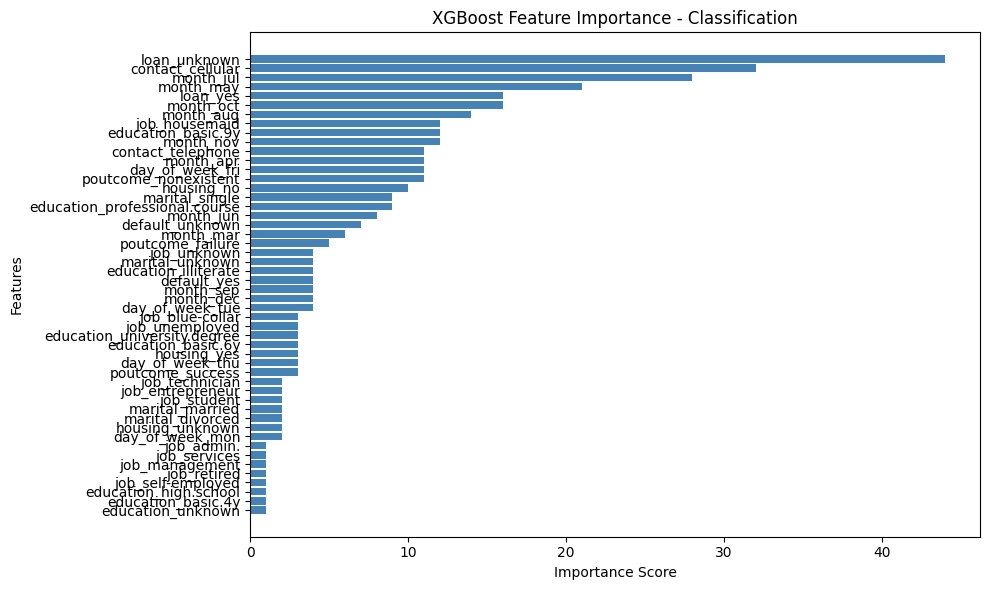

In [26]:
feature_selector.plot_feature_importance(topn=50)

In [27]:
feature_selector.get_probability_impact_summary()[["Feature", "Threshold", "Prob_Impact"]]

,Feature,Threshold,Prob_Impact
3,duration_sub_pdays,3600.000000,0.148376
11,f263,-45.695000,0.114110
14,campaign_add_cons_price_idx,163.000000,0.107117
18,duration_div_previous,143.000000,0.096442
33,duration_sub_pdays,3503.000000,0.078533
...,...,...,...
833,f254,18.824335,0.000211
748,campaign_mult_cons_price_idx,50.000000,0.000138
1126,pdays_sub_cons_conf_idx,3.000000,0.000111
629,pdays_mult_cons_price_idx,93.950180,0.000040


In [28]:
feature_selector.feature_idx_name_mapping

{'f0': 'age',
 'f1': 'duration',
 'f2': 'campaign',
 'f3': 'pdays',
 'f4': 'previous',
 'f5': 'emp_var_rate',
 'f6': 'cons_price_idx',
 'f7': 'cons_conf_idx',
 'f8': 'euribor3m',
 'f9': 'nr_employed',
 'f10': 'age_log',
 'f11': 'age_sqrt',
 'f12': 'age_square',
 'f13': 'age_cube',
 'f14': 'duration_log',
 'f15': 'duration_sqrt',
 'f16': 'duration_square',
 'f17': 'duration_cube',
 'f18': 'campaign_log',
 'f19': 'campaign_sqrt',
 'f20': 'campaign_square',
 'f21': 'campaign_cube',
 'f22': 'pdays_log',
 'f23': 'pdays_sqrt',
 'f24': 'pdays_square',
 'f25': 'pdays_cube',
 'f26': 'previous_log',
 'f27': 'previous_sqrt',
 'f28': 'previous_square',
 'f29': 'previous_cube',
 'f30': 'emp_var_rate_log',
 'f31': 'emp_var_rate_sqrt',
 'f32': 'emp_var_rate_square',
 'f33': 'emp_var_rate_cube',
 'f34': 'cons_price_idx_log',
 'f35': 'cons_price_idx_sqrt',
 'f36': 'cons_price_idx_square',
 'f37': 'cons_price_idx_cube',
 'f38': 'cons_conf_idx_log',
 'f39': 'cons_conf_idx_sqrt',
 'f40': 'cons_conf_idx_sq

In [ ]:
# TODO: Fix Bug - total features are 249 only 238 are captured here
len(feature_selector.feature_idx_name_mapping)

238

26/01/15 11:09:42 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 928440 ms exceeds timeout 120000 ms
26/01/15 11:09:42 WARN SparkContext: Killing executors is not supported by current scheduler.
26/01/15 11:09:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:53)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:359)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:132)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$